# Librerias

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Carga de datos

In [2]:
df = pd.read_csv("../../01_data/04_modelo4/train4.csv", index_col = 0)
df.head(2)

,depth,table,x,price,cut_encoded,color_encoded,clarity_encoded
carat,,,,,,,
0.30,62.4,58.0,4.31,6.353,3.0,5.0,0.0
1.01,62.7,56.0,6.42,9.183,4.0,6.0,5.0


# Reparto de datos en train y test

In [3]:
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [4]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())

Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [5]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


# Decision Tree

In [6]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: total: 0 ns
Wall time: 0 ns


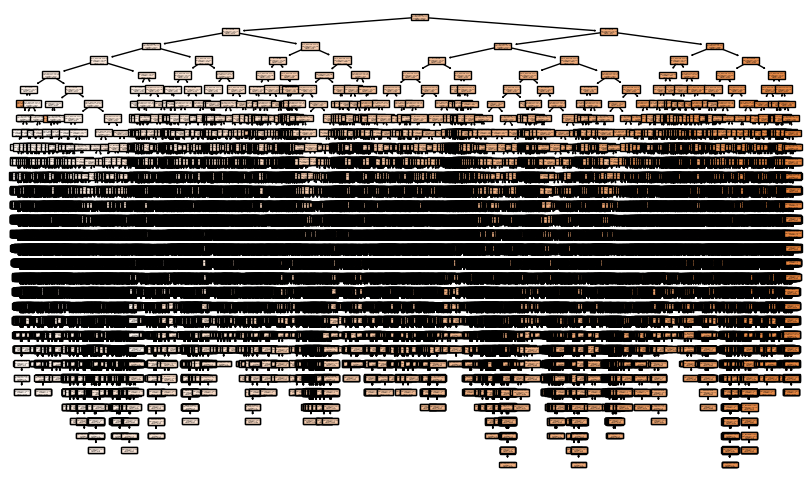

In [7]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [8]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

2.449489742783178

In [9]:
# max depth

print(regressor.tree_.max_depth)

31


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [12]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.106184,0.021773,0.147556,0.978680,test,Decission Tree I
1,0.000801,0.000070,0.008360,0.999933,train,Decission Tree I


In [13]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [14]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.804, test=-0.814) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.194, test=-0.198) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.978, test=-0.967) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.419, test=-0.418) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.940, test=-0.948) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.754, test=-0.766) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.901, test=-0.917) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=1, min_samples_split=10;,

[CV 4/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.062, test=-0.062) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.224, test=-0.229) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.424, test=-0.456) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.573, test=-0.593) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.205, test=-0.202) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.123, test=-0.119) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.067, test=-0.071) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.128, test=-0.130) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min

[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.088, test=-0.090) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.059, test=-0.059) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.056, test=-0.060) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.064, test=-0.063) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.058, test=-0.056) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.061, test=-0.067) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.056, test=-0.055) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.056, test=-0.055) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6

[CV 7/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.108, test=-0.112) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.077, test=-0.078) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.288, test=-0.269) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.190, test=-0.189) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.509, test=-0.509) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.215, test=-0.223) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.206, test=-0.215) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, min_

[CV 10/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.044, test=-0.050) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.064, test=-0.063) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.052, test=-0.052) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.055, test=-0.056) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.052, test=-0.055) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.088, test=-0.088) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.058, test=-0.058) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.049, test=-0.054) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=

[CV 4/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.212, test=-0.224) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.870, test=-0.873) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.192, test=-0.196) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.145, test=-0.154) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.159, test=-0.157) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.438, test=-0.420) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.478, test=-0.481) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.822, test=-0.865) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_

[CV 6/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.060, test=-0.061) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.039, test=-0.045) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.042, test=-0.044) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.132, test=-0.128) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.112, test=-0.108) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.373, test=-0.379) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.080, test=-0.083) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.099, test=-0.104) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=3, m

[CV 5/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.040, test=-0.042) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.034, test=-0.035) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.033, test=-0.035) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.035, test=-0.037) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.032, test=-0.032) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.032, test=-0.032) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=6

[CV 1/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.125, test=-0.128) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.118, test=-0.120) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.059, test=-0.064) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.074, test=-0.076) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.126, test=-0.129) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.067, test=-0.067) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.166, test=-0.168) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.168, test=-0.170) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=2, min_s

[CV 10/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.030, test=-0.033) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.030, test=-0.031) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.088, test=-0.083) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.027, test=-0.028) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.028, test=-0.029) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.028, test=-0.030) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.029, test=-0.030) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.037, test=-0.041) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=

[CV 9/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.024, test=-0.025) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.024, test=-0.027) total time=   0.0s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [15]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=10)

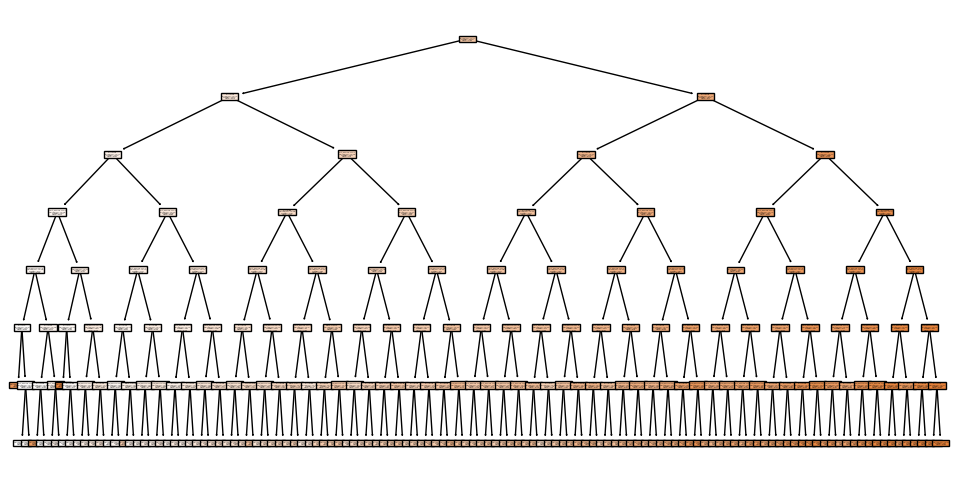

In [16]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);

In [17]:
 #guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [18]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- x <= 5.62
|   |--- x <= 4.96
|   |   |--- x <= 4.61
|   |   |   |--- clarity_encoded <= 5.50
|   |   |   |   |--- color_encoded <= 2.50
|   |   |   |   |   |--- x <= 1.96
|   |   |   |   |   |   |--- value: [9.17]
|   |   |   |   |   |--- x >  1.96
|   |   |   |   |   |   |--- clarity_encoded <= 3.50
|   |   |   |   |   |   |   |--- value: [6.21]
|   |   |   |   |   |   |--- clarity_encoded >  3.50
|   |   |   |   |   |   |   |--- value: [6.37]
|   |   |   |   |--- color_encoded >  2.50
|   |   |   |   |   |--- x <= 4.28
|   |   |   |   |   |   |--- x <= 1.87
|   |   |   |   |   |   |   |--- value: [8.98]
|   |   |   |   |   |   |--- x >  1.87
|   |   |   |   |   |   |   |--- value: [6.30]
|   |   |   |   |   |--- x >  4.28
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.38]
|   |   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |   |--- value: [6.64]
|   |   |   |--- clarity_encoded >  5.50
|   |   |   |   |---

In [19]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [20]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [21]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.121619,0.025163,0.158628,0.975361,test,Decision tree II
1,0.119209,0.023703,0.153958,0.977144,train,Decision tree II


# prueba predicciones 

In [22]:
df = pd.read_csv("../../01_data/04_modelo4/test4.csv", index_col = 0)
X_realida = df


In [23]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.21451425, 8.38746048, 9.37001299, ..., 6.63721462, 8.59309655,
       7.7742655 ])

In [24]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.214514
1,1,8.387460
2,2,9.370013
3,3,7.787406
4,4,9.182613
...,...,...
13480,13480,8.543352
13481,13481,8.348044
13482,13482,6.637215
13483,13483,8.593097


In [26]:
submision1.to_csv("df_submision4.csv", index=False)